## Hypothèses :
#### heure de connexion, heure d'achat, différence entre signup time et le purchase, eventuellement connaitre la fiabilité d'un navigateur

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
fraud = pd.read_csv('fraud_data_country.csv')
fraud['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

#### Dummies sur les variables "source", "browser", "sex"
#### Regarder si les 'device_id' correspondent à un ordi ou portable etc...
#### KBinsDiscretizer sur les 'age' & 'purchase_value'
#### Convertir en datetime 'signup_time' & 'purchase_time'
#### Droper user_id

In [89]:
fraud.describe(include ='all')

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
count,151112.000000,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000,151112
unique,NaN,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN,182
top,NaN,NaN,2015-02-27 12:04:04,2015-09-10 09:04:53,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN,United States
freq,NaN,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN,58049
mean,75555.500000,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646,NaN
std,43622.421276,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336,NaN
min,0.000000,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000,NaN
25%,37777.750000,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000,NaN
50%,75555.500000,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000,NaN
75%,113333.250000,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000,NaN


### Suppression des variables

In [0]:
fraud = fraud.drop(['Unnamed: 0', 'user_id', 'device_id', 'ip_address'], axis = 'columns')

In [91]:
fraud.columns.isnull().any()

False

#### Suppression des NaN (1)

In [0]:
fraud = fraud.dropna()
fraud = fraud.reset_index(drop=True)

In [93]:
fraud.describe(include ='all')

,signup_time,purchase_time,purchase_value,source,browser,sex,age,class,country
count,151112,151112,151112.000000,151112,151112,151112,151112.000000,151112.000000,151112
unique,151112,150679,NaN,3,5,2,NaN,NaN,182
top,2015-02-27 12:04:04,2015-09-10 09:04:53,NaN,SEO,Chrome,M,NaN,NaN,United States
freq,1,3,NaN,60615,61432,88293,NaN,NaN,58049
mean,NaN,NaN,36.935372,NaN,NaN,NaN,33.140704,0.093646,NaN
std,NaN,NaN,18.322762,NaN,NaN,NaN,8.617733,0.291336,NaN
min,NaN,NaN,9.000000,NaN,NaN,NaN,18.000000,0.000000,NaN
25%,NaN,NaN,22.000000,NaN,NaN,NaN,27.000000,0.000000,NaN
50%,NaN,NaN,35.000000,NaN,NaN,NaN,33.000000,0.000000,NaN
75%,NaN,NaN,49.000000,NaN,NaN,NaN,39.000000,0.000000,NaN


### Convertion en DateTime

In [0]:
fraud.signup_time = pd.to_datetime(fraud.signup_time)
fraud.purchase_time = pd.to_datetime(fraud.purchase_time)

### Création d'une variable pour connaitre la durée entre en l'inscription et l'achat

In [0]:
    ### Création de la colonne lapse time
fraud['lapse_time'] = (fraud.purchase_time - fraud.signup_time)

In [0]:
    ### Conversion en seconde
fraud['lapse_time'] = fraud.lapse_time.dt.total_seconds()

In [0]:
    ### Suppresion des colonnes signup & purchase
fraud = fraud.iloc[:, 2:]

In [98]:
fraud.sort_values(by = ['lapse_time'])

,purchase_value,source,browser,sex,age,class,country,lapse_time
128682,13,SEO,FireFox,F,26,1,United States,1.0
7372,62,Ads,Chrome,F,24,1,United States,1.0
92770,27,SEO,FireFox,M,29,1,United States,1.0
15041,69,Ads,Chrome,F,34,1,Ireland,1.0
48807,9,Ads,IE,F,35,1,unknown,1.0
28480,13,SEO,FireFox,F,26,1,United States,1.0
92782,15,SEO,Safari,M,45,1,unknown,1.0
92768,70,Direct,Chrome,M,31,1,unknown,1.0
116890,70,Direct,IE,M,36,1,unknown,1.0
48784,34,SEO,Safari,F,32,1,United States,1.0


In [99]:
fraud.lapse_time[fraud['class']==1].apply(lambda x : 0 if x < 60
                                          else 1).value_counts()

0    7600
1    6551
Name: lapse_time, dtype: int64

#### Il y a donc 1568/3380 fraudeurs qui ont signup et purchase < 60s
#### Il y a donc 1812/3380 fraudeurs qui ont signup et purchase > 60s

In [0]:
pct_fraud = fraud['class'].groupby(fraud['class']).value_counts()

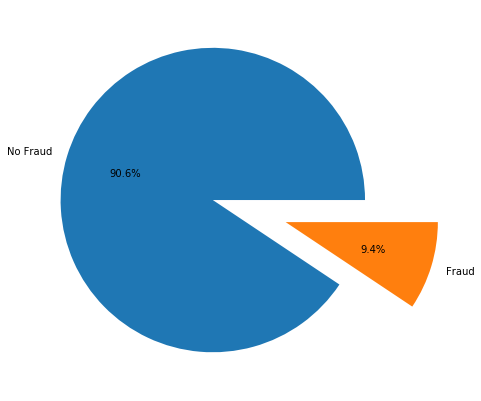

In [101]:
  ### Camembert
plt.figure(figsize = (15,7))
labels = ["No Fraud", 'Fraud']
values = pct_fraud 
explode = [0, 0.5]
plt.pie(values, labels=labels, autopct= '%1.1f%%', explode = explode)
plt.show()

In [102]:
fraud_dummies = pd.get_dummies(fraud, drop_first = True)
fraud_dummies.head()

,purchase_value,age,class,lapse_time,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire; Sint Eustatius; Saba,country_Bosnia and Herzegowina,country_Botswana,country_Brazil,country_British Indian Ocean Territory,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,...,country_Saint Martin,country_San Marino,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Singapore,country_Slovakia (SLOVAK Republic),country_Slovenia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Taiwan; Republic of China (ROC),country_Tajikistan,country_Tanzania United Republic of,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,country_unknown
0,34,39,0,4506682.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16,53,0,17944.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,15,53,1,1.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,44,41,0,492085.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,39,45,0,4361461.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [103]:
fraud_dummies.columns

Index(['purchase_value', 'age', 'class', 'lapse_time', 'source_Direct',
       'source_SEO', 'browser_FireFox', 'browser_IE', 'browser_Opera',
       'browser_Safari',
       ...
       'country_Uruguay', 'country_Uzbekistan', 'country_Vanuatu',
       'country_Venezuela', 'country_Viet Nam',
       'country_Virgin Islands (U.S.)', 'country_Yemen', 'country_Zambia',
       'country_Zimbabwe', 'country_unknown'],
      dtype='object', length=192)

In [0]:
X = fraud_dummies.loc[:, fraud_dummies.columns!='class']
y = fraud_dummies.iloc[:, 2:3]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state = 42,
                                                    test_size = 0.3)

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc.score(X_test, y_test)
y_pred = rfc.predict(X_test)

In [109]:
!pip install graphviz

In [112]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(rfc, out_file = None, feature_names = X.columns)
graph = graphviz.Source(dot_data)
graph

NotFittedError: ignored

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')

#### Faux positifs : 72
#### Faux négatifs : 1929

In [0]:
"""
#################################
#########   FONCTION    #########
#################################

fraud_sample = fraud.sample(2000)

def ip_to_country (arg = None) : 
  for i in ip.values.tolist():
    if ((arg >= i[0]) & (arg <= i[1])) :
      return i[2]
  return 'unknown'

fraud_sample.ip_address.apply(lambda x: ip_to_country(x))


#################################
#########   FONCTION    #########
#################################

fraud_data['country'] = (fraud.ip_address.apply(lambda x: ip.query('lower_bound_ip_address <= @x <= upper_bound_ip_address')\
                                          .index.values).apply(lambda x: x[0] if len(x) else -1)).apply(lambda x: ip.country\
                                                                                                        [x] if x != -1 else x)
"""

In [0]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': np.arange(1, 50, 1)}
rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid = params, cv = 10)
grid_fit = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 